
Credits: This notebook is based on a [Python tutorial](http://cs231n.github.io/python-numpy-tutorial/) by [Justin Johnson](https://web.eecs.umich.edu/~justincj/) for [CS231n](http://cs231n.github.io/). 

## Introduction

We will use the Python programming language for all assignments in this course. Python is a great general-purpose programming language on its own, but with the help of a few popular libraries (numpy, scipy, matplotlib) it becomes a powerful environment for scientific computing.

We expect that many of you will have some experience with Python and numpy; for the rest of you, this section will serve as a quick crash course both on the Python programming language and on the use of Python for scientific computing.

In this tutorial, we will cover:

* Basic Python: Basic data types (Containers, Lists, Dictionaries, Sets, Tuples), Functions, Classes
* Numpy: Arrays, Array indexing, Datatypes, Array math, Broadcasting
* Matplotlib: Plotting, Subplots, Images
* IPython: Creating notebooks, Typical workflows

## Basics of Python

Python is a high-level, dynamically typed multiparadigm programming language. Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable. As an example, here is an implementation of the classic quicksort algorithm in Python:

In [1]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([5,16,1,50,0,5,14]))
# Prints "[0, 1, 5, 5, 14, 16, 50]"

[0, 1, 5, 5, 14, 16, 50]


### Python versions

For this class all code will use Python 3.7. You can check your Python version by executing the cell below:

In [2]:
!python3 --version

Python 3.12.11


### Basic data types

#### Numbers

Integers and floats work as you would expect from other languages:

In [3]:
x = 10
print(type(x)) # Prints "<class 'int'>"
print(x)       # Prints "3"

<class 'int'>
10


In [4]:
print(x + 1)   # Addition; prints "4"
print(x - 1)   # Subtraction; prints "2"
print(x * 2)   # Multiplication; prints "6"
print(x ** 2)  # Exponentiation; prints "9"

11
9
20
100


In [5]:
x += 1
print(x)  # Prints "4"
x *= 2
print(x)  # Prints "8"

11
22


In [6]:
y = 9.5
print(type(y)) # Prints "<class 'float'>"
print(y, y + 1, y * 2, y ** 2) # Prints "2.5 3.5 5.0 6.25"

<class 'float'>
9.5 10.5 19.0 90.25


Note that unlike many languages, Python does not have unary increment (x++) or decrement (x--) operators.

Python also has built-in types for long integers and complex numbers; you can find all of the details in the [documentation](https://docs.python.org/3.7/library/stdtypes.html#numeric-types-int-float-complex).

#### Booleans

Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols (`&&`, `||`, etc.):

In [7]:
t = True
f = False
print(type(t)) # Prints "<class 'bool'>"
print(t and f) # Logical AND; prints "False"
print(t or f)  # Logical OR; prints "True"
print(not t)   # Logical NOT; prints "False"
print(t != f)  # Logical XOR; prints "True"

<class 'bool'>
False
True
False
True


#### Strings

Python has great support for strings:

In [8]:
machine = 'machine'    # String literals can use single quotes
learning = "learning"    # or double quotes; it does not matter.
print(machine)       # Prints "machine"
print(len(machine))  # String length; prints "7"
course = machine + ' ' + learning  # String concatenation
print(course)  # prints "machine learning"
code = '%s %s %d' % (machine, learning, 535)  # sprintf style string formatting
print(code)  # prints "machine learning 535"

machine
7
machine learning
machine learning 535


String objects have a bunch of useful methods; for example:

In [9]:
s = "neural networks"
print(s.capitalize())  # Capitalize a string; prints "Neural nerworks"
print(s.upper())       # Convert a string to uppercase; prints "NEURAL NETWORKS"
print(s.rjust(20))      # Right-justify a string, padding with spaces; prints "     neural networks"
print(s.center(20))     # Center a string, padding with spaces; prints "  neural networks   "
print(s.replace('ral', '(ral)'))  # Replace all instances of one substring with another;
                                # prints "he(ell)(ell)o"
print('  AI    '.strip())  # Strip leading and trailing whitespace; prints "AI"

Neural networks
NEURAL NETWORKS
     neural networks
  neural networks   
neu(ral) networks
AI


You can find a list of all string methods in the [documentation](https://docs.python.org/3.7/library/stdtypes.html#string-methods).

### Containers

Python includes several built-in container types: lists, dictionaries, sets, and tuples.

#### Lists

A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [10]:
xs = [5, 1, 9]    # Create a list
print(xs, xs[2])  # Prints "[5, 1, 9] 9"
print(xs[-1])     # Negative indices count from the end of the list; prints "9"
xs[2] = 'scrap'     # Lists can contain elements of different types
print(xs)         # Prints "[5, 1, 'scrap']"
xs.append('!')  # Add a new element to the end of the list
print(xs)         # Prints "[5, 1, 'scrap', '!']"
x = xs.pop()      # Remove and return the last element of the list
print(x, xs)      # Prints "! [5, 1, 'scrap']"

[5, 1, 9] 9
9
[5, 1, 'scrap']
[5, 1, 'scrap', '!']
! [5, 1, 'scrap']


As usual, you can find all the gory details about lists in the [documentation](https://docs.python.org/3.7/tutorial/datastructures.html#more-on-lists).

##### Slicing

In addition to accessing list elements one at a time, Python provides concise syntax to access sublists; this is known as slicing:

In [11]:
nums = list(range(5))     # range is a built-in function that creates a list of integers
print(nums)               # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])          # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])           # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])           # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])            # Get a slice of the whole list; prints "[0, 1, 2, 3, 4]"
print(nums[:-1])          # Slice indices can be negative; prints "[0, 1, 2, 3]"
nums[2:4] = [8, 9]        # Assign a new sublist to a slice
print(nums)               # Prints "[0, 1, 8, 9, 4]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


##### Loops

You can loop over the elements of a list like this:

In [12]:
games = ['CS:GO', 'Valorant', 'Rainbow Siege']
for game in games:
    print(game)
# Prints "CS:GO", "Valorant", "Rainbow Siege", each on its own line.

CS:GO
Valorant
Rainbow Siege


If you want access to the index of each element within the body of a loop, use the built-in `enumerate` function:

In [13]:
animals = ['Cat', 'Duck', 'Dog']
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))
# Prints "#1: Cat", "#2: Duck", "#3: Dog", each on its own line

#1: Cat
#2: Duck
#3: Dog


##### List comprehensions:

When programming, frequently we want to transform one type of data into another. As a simple example, consider the following code that computes square numbers:

In [14]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)   # Prints [0, 1, 4, 9, 16]

[0, 1, 4, 9, 16]


You can make this code simpler using a list comprehension:

In [15]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)   # Prints [0, 1, 4, 9, 16]

[0, 1, 4, 9, 16]


List comprehensions can also contain conditions:

In [16]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)  # Prints "[0, 4, 16]"
odd_squares = [x ** 2 for x in nums if x % 2 != 0]
print(odd_squares)  # Prints "[1, 9]"

[0, 4, 16]
[1, 9]


#### Dictionaries

A dictionary stores (key, value) pairs, similar to a `Map` in Java or an object in Javascript. You can use it like this:

In [17]:
d = {'swings': 'fun', 'pasta': 'tasty'}  # Create a new dictionary with some data
print(d['swings'])       # Get an entry from a dictionary; prints "fun"
print('swings' in d)     # Check if a dictionary has a given key; prints "True"
d['duck'] = 'cute'     # Set an entry in a dictionary
print(d['duck'])      # Prints "cute"
# print(d['cat'])  # KeyError: 'cat' not a key of d
print(d.get('monkey', 'N/A'))  # Get an element with a default; prints "N/A"
print(d.get('duck', 'N/A'))    # Get an element with a default; prints "cute"
del d['duck']         # Remove an element from a dictionary
print(d.get('duck', 'N/A')) # "duck" is no longer a key; prints "N/A"

fun
True
cute
N/A
cute
N/A


You can find all you need to know about dictionaries in the [documentation](https://docs.python.org/3.7/library/stdtypes.html#dict).

##### Loops 

It is easy to iterate over the keys in a dictionary:

In [18]:
d = {'Real Madrid': 14, 'Liverpool': 6, 'Barcelona': 5}
for team in d:
    titles = d[team]
    print('%s has %d UEFA Champions League titles' % (team, titles))
# Prints "Real Madrid has 14 UEFA Champions League titles", "Liverpool has 6 UEFA Champions League titles", "Barcelona has 5 UEFA Champions League titles"

Real Madrid has 14 UEFA Champions League titles
Liverpool has 6 UEFA Champions League titles
Barcelona has 5 UEFA Champions League titles


If you want access to keys and their corresponding values, use the `items` method:

In [19]:
d = {'Real Madrid': 14, 'Liverpool': 6, 'Barcelona': 5}
for team, titles in d.items():
    print('%s has %d UEFA Champions League titles' % (team, titles))
# Prints "Real Madrid has 14 UEFA Champions League titles", "Liverpool has 6 UEFA Champions League titles", "Barcelona has 5 UEFA Champions League titles"

Real Madrid has 14 UEFA Champions League titles
Liverpool has 6 UEFA Champions League titles
Barcelona has 5 UEFA Champions League titles


##### Dictionary comprehensions 

These are similar to list comprehensions, but allow you to easily construct dictionaries. For example:

In [20]:
nums = [0, 1, 2, 3, 4, 5]
odd_num_to_square = {x: x ** 2 for x in nums if x % 2 != 0}
print(odd_num_to_square)  # Prints "{1: 1, 3: 9, 5: 25}"

{1: 1, 3: 9, 5: 25}


#### Sets

A set is an unordered collection of distinct elements. As a simple example, consider the following:

In [21]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"
animals.add('fish')       # Add an element to a set
print('fish' in animals)  # Prints "True"
print(len(animals))       # Number of elements in a set; prints "3"
animals.add('cat')        # Adding an element that is already in the set does nothing
print(len(animals))       # Prints "3"
animals.remove('cat')     # Remove an element from a set
print(len(animals))       # Prints "2"

True
False
True
3
3
2


As usual, everything you want to know about sets can be found in the [documentation](https://docs.python.org/3.7/library/stdtypes.html#set).

##### Loops 

Iterating over a set has the same syntax as iterating over a list; however since sets are unordered, you cannot make assumptions about the order in which you visit the elements of the set:

In [22]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))
# Prints "#1: fish", "#2: cat", "#3: dog"

#1: cat
#2: fish
#3: dog


##### Set comprehensions

Like lists and dictionaries, we can easily construct sets using set comprehensions:

In [23]:
from math import sqrt
nums = {int(sqrt(x)) for x in range(30)}
print(nums)  # Prints "{0, 1, 2, 3, 4, 5}"

{0, 1, 2, 3, 4, 5}


#### Tuples

A tuple is an (immutable) ordered list of values. A tuple is in many ways similar to a list; one of the most important differences is that tuples can be used as keys in dictionaries and as elements of sets, while lists cannot. Here is a trivial example:

In [24]:
d = {(x, 9 - x): x for x in range(10)}  # Create a dictionary with tuple keys
t = (8, 1)        # Create a tuple
print(type(t))    # Prints "<class 'tuple'>"
print(d[t])       # Prints "8"
print(d[(8, 1)])  # Prints "8"

<class 'tuple'>
8
8


The [documentation](https://docs.python.org/3.7/tutorial/datastructures.html#tuples-and-sequences) has more information about tuples.

### Functions

Python functions are defined using the `def` keyword. For example:

In [25]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))
# Prints "negative", "zero", "positive"

negative
zero
positive


We will often define functions to take optional keyword arguments, like this:

In [26]:
def hello(name, loud=False):
    if loud:
        print('HELLO, %s!' % name.upper())
    else:
        print('Hello, %s' % name)

hello('Rick') # Prints "Hello, Bob"
hello('Morty', loud=True)  # Prints "HELLO, FRED!"

Hello, Rick
HELLO, MORTY!


There is a lot more information about Python functions in the [documentation](https://docs.python.org/3.7/tutorial/controlflow.html#defining-functions).

#### Lambda Functions
These are anonymous functions in Python which take any number of arguments but only one expression. Syntax: 
`lambda arguments : expression`. They are one line function and expression are representing the body of a normal function.

In [27]:
l = lambda a : a+10  ## lambda function 'l' is created which is taking 'a' as an argument and expression adds 10 to the value of argument a
print(l(4))  ## passing 4 as value of 'a' argument of lambda function 'l' . This will return 12(12 = 4+10) as output.

l1 = lambda a,b,c : a * b * c ## lambda function 'l1' is created which is taking 3 arguments (a,b,c) and return the result by multiplying them all.
print(l1(10,20,30))  ## passing 10,20,30 as arguments 'a', 'b', 'c' respectively to 'l1' function. Print result 6000 (6000 = 10*20*30)

14
6000


We can use Lambda function anonymously inside other functions. Example is shown below

In [28]:
def func(n):  ## define a function that takes argument 'n' and returns a lambda function after dividing some unknown argument 'a' with given 'n'
  return lambda a: a/n

l2 = func(10)  ## passing 10 as value of 'n' in 'func' function. This will return lambda function 'l2' where n is assigned a value of 10.
print(l2(7)) ## This will call lambda function 'l2' where 7 is given as value for argument 'a'. Print 0.7(0.7 = 7/10) as result 

0.7


### Classes

The syntax for defining classes in Python is straightforward:

In [29]:
class Greeter(object):

    # Constructor
    def __init__(self, name):
        self.name = name  # Create an instance variable

    # Instance method
    def greet(self, loud=False):
        if loud:
            print('HELLO, %s!' % self.name.upper())
        else:
            print('Hello, %s' % self.name)

g = Greeter('Nezuko')  # Construct an instance of the Greeter class
g.greet()            # Call an instance method; prints "Hello, Fred"
g.greet(loud=True)   # Call an instance method; prints "HELLO, FRED!"

Hello, Nezuko
HELLO, NEZUKO!


You can read a lot more about Python classes in the [documentation](https://docs.python.org/3.7/tutorial/classes.html).

## Numpy

[Numpy](https://numpy.org/) is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.

To use Numpy, we first need to import the `numpy` package:

In [30]:
import numpy as np

### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [31]:
a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]
(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [32]:
a = np.zeros((2,2))   # Create an array of all zeros
print(a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

b = np.ones((1,2))    # Create an array of all ones
print(b)              # Prints "[[ 1.  1.]]"

c = np.full((2,2), 7)  # Create a constant array
print(c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

d = np.eye(2)         # Create a 2x2 identity matrix
print(d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

e = np.random.random((2,2))  # Create an array filled with random values
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.49663618 0.1842106 ]
 [0.12048097 0.22230247]]


You can read about other methods of array creation in the [documentation](https://docs.scipy.org/doc/numpy/user/basics.creation.html#arrays-creation).

### Array indexing

Numpy offers several ways to index into arrays.

#### Slicing 

Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [33]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]

# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array:

In [34]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


#### Integer array indexing

When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [35]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])  # Prints "[1 4 5]"

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # Prints "[1 4 5]"

# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])  # Prints "[2 2]"

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))  # Prints "[2 2]"

[1 4 5]
[1 4 5]
[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [36]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a)  # prints "array([[ 1,  2,  3],
          #                [ 4,  5,  6],
          #                [ 7,  8,  9],
          #                [10, 11, 12]])"

# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

print(a)  # prints "array([[11,  2,  3],
          #                [ 4,  5, 16],
          #                [17,  8,  9],
          #                [10, 21, 12]])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]
[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


#### Boolean array indexing 

Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [37]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.

print(bool_idx)      # Prints "[[False False]
                     #          [ True  True]
                     #          [ True  True]]"

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])  # Prints "[3 4 5 6]"

# We can do all of the above in a single concise statement:
print(a[a > 2])     # Prints "[3 4 5 6]"

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the [documentation](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html).

### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [38]:
x = np.array([1, 2])   # Let numpy choose the datatype
print(x.dtype)         # Prints "int64"

x = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(x.dtype)             # Prints "float64"

x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(x.dtype)                         # Prints "int64"

int64
float64
int64


You can read all about numpy datatypes in the [documentation](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [39]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


We use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [40]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

219
219
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [41]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](https://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [42]:
x = np.array([[1,2], [3,4]])
print(x)    # Prints "[[1 2]
            #          [3 4]]"
print(x.T)  # Prints "[[1 3]
            #          [2 4]]"

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[1 2 3]
[1 2 3]


Numpy provides many more functions for manipulating arrays; you can see the full list in the [documentation](https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html).

### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [43]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

# Now y is the following
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector `v` to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [44]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))   # Stack 4 copies of v on top of each other
print(vv)                 # Prints "[[1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]]"
y = x + vv  # Add x and vv elementwise
print(y)  # Prints "[[ 2  2  4
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of `v`. Consider this version, using broadcasting:

In [45]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)  # Prints "[[ 2  2  4]
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if `v` actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
The arrays can be broadcast together if they are compatible in all dimensions.
After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension
If this explanation does not make sense, try reading the explanation from the [documentation](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](https://numpy.org/devdocs/user/theory.broadcasting.html).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [46]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print(np.reshape(v, (3, 1)) * w)

# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
# [[2 4 6]
#  [5 7 9]]
print(x + v)

# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
# [[ 5  6  7]
#  [ 9 10 11]]
print((x.T + w).T)
# Another solution is to reshape w to be a column vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
# [[ 2  4  6]
#  [ 8 10 12]]
print(x * 2)

[[ 4  5]
 [ 8 10]
 [12 15]]
[[2 4 6]
 [5 7 9]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 2  4  6]
 [ 8 10 12]]


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](https://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

## Iterators

Iterators are objects that contain countable number of values. Iterators can traverse the different structures like list, dictionaries, tuples, strings and sets etc through their values. The structures on which iterators can iterate on are called **iterable objects**. For example, we will make a list and return iterator from it.The `next()` function on iterator is called to get the next item from iterator.

In [47]:
mylist = ['blue', 'orange', 'green', 'yellow']  ## create a list 'mylist'
itr = iter(mylist)  ## create an iterator of mylist using iter() function
print(next(itr))  ## print 1st element of mylist
print(next(itr))  ## print 2nd element of mylist
print(next(itr))  ## print 3rd element of mylist
print(next(itr))  ## print 4rth element of mylist

blue
orange
green
yellow


## Zip in Python
Zip function returns a zip object which is an iterator of tuples where first tuple represent the first enteries of the two passed tuples paired together, second tuple represents the second entries of passed tuples paired together and so on.
Example below shows two tuples `a` and `b` passed as input to `zip` function to zip respective entries together.


In [48]:
a = ('2', '3', '4', '5', '6')  ## create tuple 'a'
b = ('4', '9', '16', '25', '36')  ## create b tuple 'b'
z = zip(a,b) ## zip both tuples 
print(tuple(z)) ## print zip result. Will print (('2', '4'), ('3', '9'), ('4', '16'), ('5', '25'), ('6', '36'))

(('2', '4'), ('3', '9'), ('4', '16'), ('5', '25'), ('6', '36'))


### Zip Lists

Zip can also be used to zip entries of two lists together. Example is given below:

In [49]:
a = ['l1', 'l2', 'l3', 'l4', 'l5'] ## create list 'a'
b = ['s1', 's2', 's3', 's4', 's5'] ## create tuple 'b'
z = zip(a,b) ## zip both lists 
print(list(z))## print zip result. Will print [('l1', 's1'), ('l2', 's2'), ('l3', 's3'), ('l4', 's4'), ('l5', 's5')]

[('l1', 's1'), ('l2', 's2'), ('l3', 's3'), ('l4', 's4'), ('l5', 's5')]


### Zip Lists to a dictionary
We can zip entries of two lists together to form a dictionary. Given an example below use `zip` and `dict` functions. `dict` converts zip iterator to a dictionary.

In [50]:
stocks = ['Alphabet C', 'VCPlus', 'TCS']  ## create list 'stocks'
prices = [3452, 1127, 2750]  ## create list 'prices'
dictionary = dict(zip(stocks, prices))   ## zip the two lists and convert zip object to a dictionary using dict()
print(dictionary) ## print dictionary {'Alphabet C': 3452, 'VCPlus': 1127, 'TCS': 2750}

{'Alphabet C': 3452, 'VCPlus': 1127, 'TCS': 2750}


To read more on zip built-in function, refer to [documentation](https://docs.python.org/3/library/functions.html#zip) here.

## Matplotlib

[Matplotlib](https://matplotlib.org/) is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [51]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [52]:
%matplotlib inline

### Plotting

The most important function in `matplotlib` is `plot`, which allows you to plot 2D data. Here is a simple example:

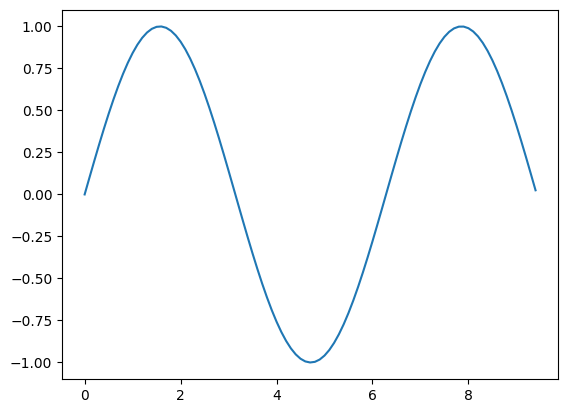

In [53]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)
plt.show()  # You must call plt.show() to make graphics appear.

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

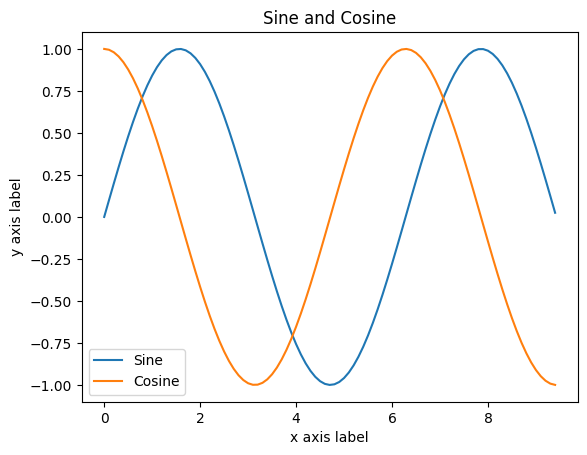

In [54]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

You can read much more about the `plot` function in the [documentation](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot).

### Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

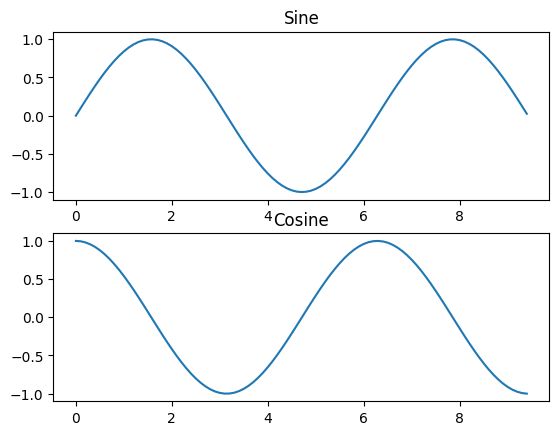

In [55]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

## Regex

A regular expression (or RE) specifies a set of strings that matches it; the functions in this module let you check if a particular string matches a given regular expression (or if a given regular expression matches a particular string, which comes down to the same thing). Regex may involve metacharaters/Sequences/Sets that form a search pattern.

1. `^` matches the start of the string
2. `*` matches zero or more number of repitions of preceding Regular expression.
3.  `$` matches the end of string with given sequence.
4.  `\d`	Returns a match where the string contains digits (numbers from 0-9)
5.  `\s` returns a match where the string contains a white space character
6.  `[a-n]` returns a match for any lower case character, alphabetically between a and n.
7.  `[0-9]` returns a match for any digit between 0 and 9

Complete list of sequences can be found [here](https://docs.python.org/3/library/re.html)

To use Regex, we first need to import the package.

In [56]:
import re

This package offers variety of different functions which can be used to find patterns in the string.

###FindAll()
This method is used to print a list of all the matches of given string. If no matches are found then an empty list is returned. Following examples will explain:

In [57]:
txt = "Its been an energetic day today."
x = re.findall("day", txt) ## find all instances of string 'day' in txt string
print(x) ## print all occurences if exist

['day', 'day']


In [58]:
txt = "from"
x = "We are going there tomorrow."
x = re.findall("is", txt) ## find all instances of string 'is' in txt string
print(x) ## print empty string since no such instances exist

[]


### Split()
Split function is used to return a list where there the string has been split at each match. In example below, regular expression `\s` splits the string at each white space character.

In [59]:
txt = "We are going to a park."
x = re.split("\s", txt)
print(x)


['We', 'are', 'going', 'to', 'a', 'park.']


We can control the maximum number of splits by providing `maxsplit` parameter. In example below, only first 2 splits occurences will be found and returned as list.

In [60]:
txt = "We are going to a park."
x = re.split("\s", txt, 2)
print(x)

['We', 'are', 'going to a park.']


### Sub()
The sub() function replaces the matches with the text of your choice. For example, [0-9] regex will replace digits with given string.

In [61]:
txt = "Some digits like 100 and 490 are replaced."
x = re.sub("[0-9]", "-", txt)
print(x) 

Some digits like --- and --- are replaced.


### Search()
Returns a Match object if there is a match anywhere in the string.
Using this method, the regular expression in given example looks for any words that starts with an upper case "S":

In [62]:
txt = "The rain in Spain."
x = re.search(r"\bS\w+", txt)
print(x) ## prints match object
print(x.group()) ## prints a tuple containing all the subgroups of the match,

<re.Match object; span=(12, 17), match='Spain'>
Spain


## Reading from the File

In [63]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/daniaahmad13/Dataset/main/StudentsPerformance.csv')
data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


To filter pandas dataframe based on a value from a column

In [64]:
new_df = data.loc[data['race/ethnicity'] == "group C"]
new_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69,90,88
4,male,group C,some college,standard,none,76,78,75
10,male,group C,associate's degree,standard,none,58,54,52
15,female,group C,some high school,standard,none,69,75,78
16,male,group C,high school,standard,none,88,89,86


## Writing to a File

In [65]:
#open the file in the append mode as the write mode overwrites the first line
file1 = open("myfile.txt","a")
file1.write("Today \n")
file1.close()

## Scikit Learn

Scikit-learn, commonly known as sklearn, is a free Machine Learning library for the Python programming language. It offers numerous classification, regression, and clustering algorithms, including K-Means, Linear Regression, Logistic Regression, Naive Bayes and State Vector Machines, etc. Moreover, it supports tasks such as feature extraction, feature selection, model evaluation, model selection, parameter tuning, etc. 

Sklearn is a widely used library due to numerous reasons, such as:

1.   It is easy to learn and use.
2.   It covers all aspects of Machine Learning.
3.   It is very versatile and powerful.
4.   It is very versatile and powerful.
5.   It is an open-source library with an active community and detailed documentation.


More information regarding Sklearn, including its implementation, can be found [here](https://scikit-learn.org/stable/).


## Questions
Solve some of the questions below to get more clear understanding of python basics:

**Q1: Write the code to determine the parity (`even` or `odd`) of a given number.**             

[3 marks]

In [66]:
### write code here...
def check_parity(number):
    return False
        
print(check_parity(3))
print(check_parity(4))
    

False
False


**Q2: For the given list of strings, check if the length of the string is even or odd. Print "`even`" or "`odd`" accordingly.** [3 marks]

In [67]:
x = ['mangos', 'apple', 'watermelon', 'آڑو', 'انار']
### write code here...


**Q3: Write a code to reverse the string "HAIKYU!!" using indexing.** [2 marks]

In [68]:
### write code here...
str1 = "HAIKYU!!"
## Revers the string
print(str1)

HAIKYU!!


**Q4: For numbers in range 1 to 150, return a list of those that are multiple of 4 but not 6 using list comprehension .**  [3 marks]

In [69]:
### write code here...
def m4not6():
    pass
print(m4not6())

None


**Q5: Generate two numpy arrays x and y of 20 random integers between [1,6], compute a new array where each element is the square root of sum of corresponding entries in x and y. Use broadcasting in this question**. [5 marks]

For example: x =[1,2,0] , y =[3,4,5] 
Result: [2, 2.449, 2.236]

In [70]:
import numpy as np

### write code here...


**Q6: Given two dictionaries of ids and imdb rating, write a function to return a dictionary where keys are movie ids and values are a list containing the corresponding movie name and the imdb rating.** [5 marks]


In [71]:
from collections import defaultdict
ids = {4: 'The Godfather', 2: 'The Dark Knight', 1: 'The Lord of The Rings', 3: 'Inception', 5: 'The Matrix'} ## keys are movie ids and values are movie names
imdb_ratings = {2: 9.0, 1: 8.9, 3: 8.7, 5: 8.7, 4: 9.2}  ## keys are movie ids and values are imdb ratings

### write code here..


**Q7: Given a numpy array `x`, write a function to find all negative elements and replace them with their squares. Use boolean indexing.** [3 marks]

In [72]:
x = np.array([[5,-1,2],[-5,-2,12],[5,-15,-10]])
### write code here...


**Q8: Write a function which takes that numpy array as input and returns the following:**  [3 marks]
 

1.   Maximum value in the array
2.   Standard Deviation
3.   Sum of all the elements in the array







In [73]:
x = np.array([[5,-10,71,-5],[-10,41,-82,5],[5,5,-1,-55]])
### write code here...
def get_arr_stats(x):
    return np.amax(x), np.std(x), np.sum(x)
    
print(get_arr_stats(x))

(np.int64(71), np.float64(37.32393855006313), np.int64(-31))


**Q9: Write a Python function that accepts a string and calculates the number of upper case letters and lower case letters.**   [3 marks]



In [74]:
str = "I am Batman. Dun Dun Dun!"
### write code here...
def upper_lower_len(s):
    pass
    
print(upper_lower_len(str))

None


**Q10: Write a function that prints the integers from 1 to 150. But for multiples of five, print "Na Na Na" instead of the number, and for the multiples of six print "Batman". For numbers which are multiples of both five and six print "Na Na Na Batman".**   [3 marks]

In [75]:
### write code here...


**Q11: Write a function, `calculateSum(l,k)` which will take a list, `l` and a number `k` as input and return two numbers from `l` that add up to `k`.**   [5 marks]

In [76]:
l = [5, 1, 10, 22, 14, 2, 66]
k = 32
### write code here...
def calculateSum(l,k):
    pass

calculateSum(l,k)

**Q12: Write a function, `find_superhero`  that receives the superhero dictionary and a team name, and returns a list with names in sorted order of all superheros whose team matches the team in the argument.**   [5 marks]

In [77]:
def find_superheros(team, superheros):
    pass

superheros = {
      "Black Widow": {"age": 32, "Team": "The Avengers"},
      "Scarlet Witch": {"age": 21, "Team": "The Avengers"},
      "Captain America": {"age": 80, "Team": "The Avengers"},
      "Iron-man": {"age": 48, "Team": "The Avengers"},
      "Wonder Woman": {"age": 800, "Team": "Justice League"}, 
      "Batman": {"age": 81, "Team": "Justice League"}, 
      "Star-Lord": {"age": 38, "Team": "Guardians of the Galaxy"},
      "Groot": {"age": 25, "Team": "Guardians of the Galaxy"},
      "Gamora": {"age": 29, "Team": "Guardians of the Galaxy"},
}
print(find_superheros("The Avengers", superheros))

None


**Q13: Edit the following iterator class to return all the positive odd numbers from 1 to (n).**      [3 marks]

In [78]:
### Write code here...
class OddNumbers:
    n = 0
    def __init__(self, n):
        self.n = n
        
    def __iter__(self):
        self.a = 1
        return self

    def __next__(self):
        x = self.a
        if not x >= self.n:
            self.a += 2
            return x
        else:
            raise StopIteration

myclass = OddNumbers(30)
myiter = iter(myclass)

for x in myiter:
    print(x)

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29


**Q14: Using keys and indexing, grab the 'hello' from the given dictionaries.**
[3 marks]


In [79]:
d1 = {'simple_key':('hello')}

d2 = {'k1':{'k2':['hello']}}

d3 = {'k1':[{'nest_key':['this is deep',[({"k2": 'hello'})]]}]}

### write code here...
print(d1['simple_key'])
print(d2['k1']['k2'][0])
print(d3['k1'][0]['nest_key'][1][0]['k2'])

hello
hello
hello


**Q15: Write a python Class that accepts a tuple, has two instance variables, setter and getter methods and also write these methods to compute results accordingly:** [10 marks]

1.   def Addition(tup )
2.   def  Subtraction (tup)
3.   def Multiplication(tup)
4.   def Division(tup )
5.   def Power(tup)


In [80]:
### write code here...
class TupOperations:
    def __init__(self, tup):
        self.t1 = tup[0]
        self.t2 = tup[1]
        
    def get_tup(self):
        return (self.t1, self.t2)
    
    def set_tup(self, tup):
        self.t1 = tup[0]
        self.t2 = tup[1]
    
    def Addition(self, tup):
        t = tup.get_tup()
        return t[0] + t[1]

    def Subtraction(self, tup):
        t = tup.get_tup()
        return t[0] - t[1]

    def Multiplication(self, tup):
        t = tup.get_tup()
        return t[0] * t[1]

    def Division(self, tup):
        t = tup.get_tup()
        return t[0] / t[1]

    def Power(self, tup):
        t = tup.get_tup()
        return t[0] ** t[1]

tup = TupOperations((3,4))
print(tup.Addition(tup))
print(tup.Subtraction(tup))
print(tup.Multiplication(tup))
print(tup.Division(tup))
print(tup.Power(tup))

7
-1
12
0.75
81


**Q16. For given array x of floating point numbers. Print plots for the following functions with the specified properties. Make a different subplot for each listed number.**    [10 marks]

1. $y1$ = $x^{2} + 10$,
$y2$ = $x^{3} + x^{2}$
* X and Y axis labels
* Legend in top right corner
* Give appropriate title
* y1 line with red color
* y2 line with blue color

2. y1 = $sin(x) * sin(x)^{2}$ * $sin(x)^{3}$
* X and Y axis labels
* Legend in bottom center
* Give appropriate title
* line fontsize 20

3. y1 = $cos(x)^{3}$
* X and Y axis labels
* Legend in bottom left corner
* Give appropriate title
* y1 graph with green circles only and circles should not be connected via line.



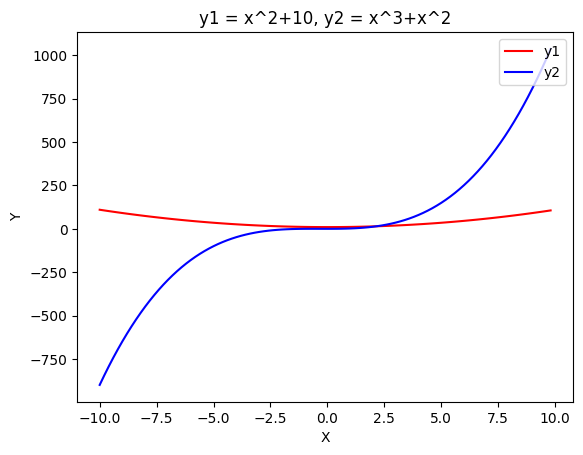

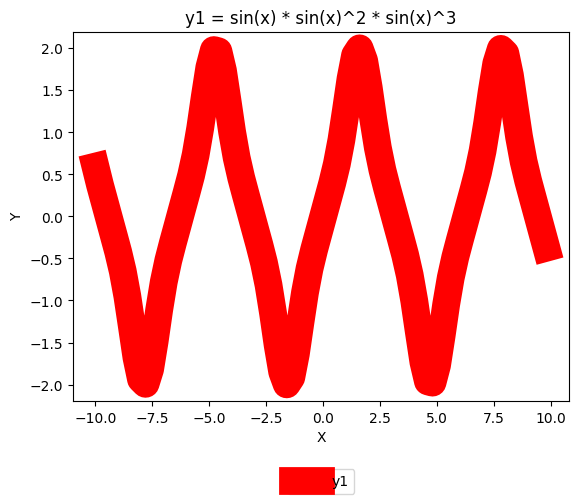

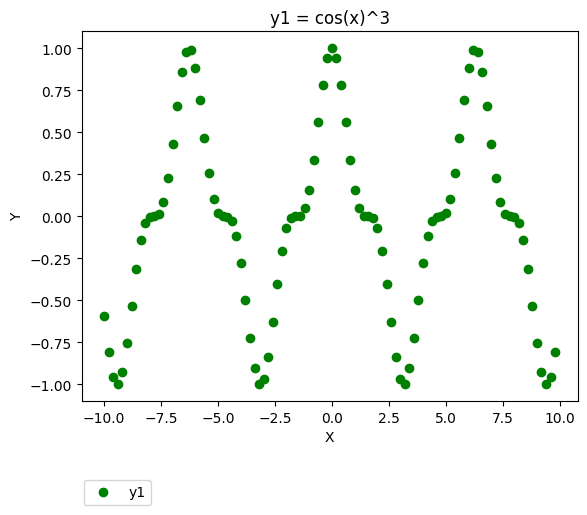

In [81]:
import matplotlib.pyplot as plt
x = np.arange(-10,10, 0.2)
## Write your code here...
y1 = (x**2) + 10
y2 = (x**3) + (x**2)
plt.plot(x, y1, 'r', label='y1')
plt.plot(x, y2, 'b', label='y2')
plt.title('y1 = x^2+10, y2 = x^3+x^2')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='upper right')


plt.show()

y1 =np.sin(x) + (np.sin(x)**2)*(np.sin(x)**3)

plt.plot(x, y1, 'r', label='y1', linewidth=20)

plt.title('y1 = sin(x) * sin(x)^2 * sin(x)^3')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='lower center', bbox_to_anchor =(0.5,-0.27))

plt.show()

y1 = np.cos(x)**3
plt.plot(x, y1, 'og', label='y1')
plt.title('y1 = cos(x)^3')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='lower left', bbox_to_anchor=(-0.01,-0.3))

plt.show()